In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = "ThreadComparisonResult_2024-02-19-12-40-43.csv"
data = pd.read_csv(file_path)

In [7]:
data.head()

,ThreadType,NumThreads,AvgExecutionTime
0,PLATFORM,100,16407460
1,VIRTUAL,100,3243780
2,POOLED,100,4878600
3,PLATFORM,200,28751360
4,VIRTUAL,200,1304740


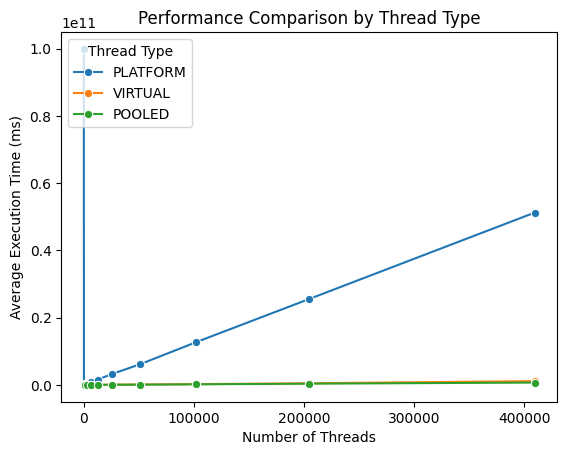

In [25]:
sns.lineplot(x='NumThreads', y='AvgExecutionTime', hue='ThreadType', marker='o', data=data)

plt.title('Performance Comparison by Thread Type')
plt.xlabel('Number of Threads')
plt.ylabel('Average Execution Time (ms)')

plt.legend(title='Thread Type', loc='upper left')
plt.show()

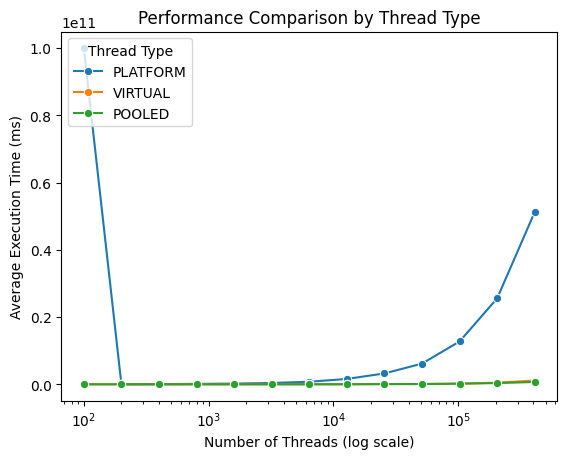

In [26]:
sns.lineplot(x='NumThreads', y='AvgExecutionTime', hue='ThreadType', data=data, marker='o', linestyle='-')

plt.xscale('log')
plt.title('Performance Comparison by Thread Type')
plt.xlabel('Number of Threads (log scale)')
plt.ylabel('Average Execution Time (ms)')

plt.legend(title='Thread Type', loc='upper left')
plt.show()

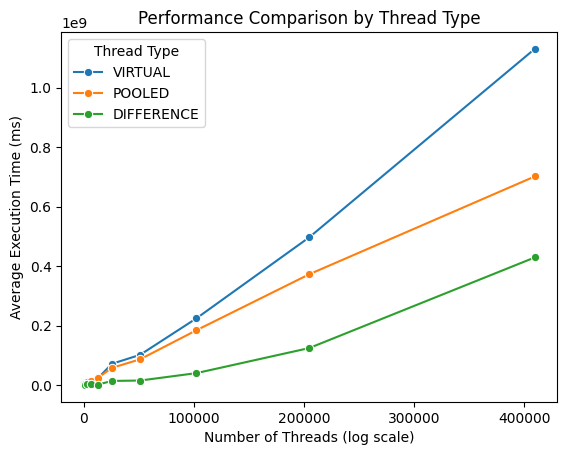

In [66]:
include_thread_types = ['VIRTUAL', 'POOLED']
filtered_data = data[data['ThreadType'].isin(include_thread_types)]

difference = filtered_data.copy()
difference['difference'] = difference.groupby('NumThreads')['AvgExecutionTime'].diff().abs()
difference.dropna(inplace=True)
difference.reset_index(drop=True, inplace=True)
difference['AvgExecutionTime'] = difference['difference']
difference['ThreadType'] = 'DIFFERENCE'
difference

filtered_data = pd.concat([filtered_data, difference])

sns.lineplot(x='NumThreads', y='AvgExecutionTime', hue='ThreadType', data=filtered_data, marker='o', linestyle='-')

plt.title('Performance Comparison by Thread Type')
plt.xlabel('Number of Threads')
plt.ylabel('Average Execution Time (ms)')

plt.legend(title='Thread Type', loc='upper left')
plt.show()

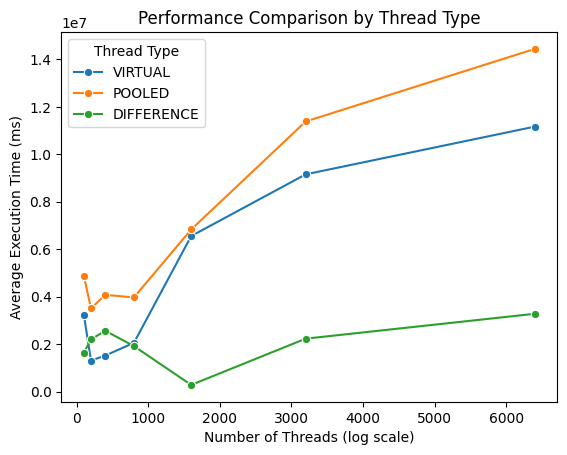

In [68]:
filtered_data_2 = filtered_data[filtered_data['NumThreads'] < 10000]

sns.lineplot(x='NumThreads', y='AvgExecutionTime', hue='ThreadType', data=filtered_data_2, marker='o', linestyle='-')

plt.title('Performance Comparison by Thread Type')
plt.xlabel('Number of Threads')
plt.ylabel('Average Execution Time (ms)')

plt.legend(title='Thread Type', loc='upper left')
plt.show()